## 🚖 Análisis de Datos de Viajes en Taxi + Prueba de Hipótesis

En este proyecto realizamos un análisis exploratorio con datos de viajes en taxi en Chicago durante noviembre de 2017, y llevamos a cabo una prueba de hipótesis sobre la duración de los viajes bajo diferentes condiciones climáticas.

### Fase 1: Análisis de datos
- 📊 Identificar las compañías con más viajes
- 🏙️ Detectar los barrios con más finalizaciones de viajes
- 📈 Visualizar los datos con gráficos claros y comentados

### Fase 2: Prueba de hipótesis
- 🧪 Evaluar si los sábados lluviosos influyen en la duración media de los viajes entre el Loop y el aeropuerto O’Hare
- 🔍 Formular H₀ y H₁, elegir un nivel de significancia y aplicar un test estadístico adecuado

Este análisis ayuda a entender el comportamiento de los viajes urbanos en función del clima y patrones de demanda.


## 🔍 1. Análisis exploratorio de datos

In [135]:
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt

In [83]:
company_raw = pd.read_csv(r'C:\Users\Dell\Documents\Data Science Program\Sprint 8\Proyecto\moved_project_sql_result_01.csv', sep=',')
trips_raw = pd.read_csv(r'C:\Users\Dell\Documents\Data Science Program\Sprint 8\Proyecto\moved_project_sql_result_04.csv', sep=',')
weather_raw = pd.read_csv(r'C:\Users\Dell\Documents\Data Science Program\Sprint 8\Proyecto\moved_project_sql_result_07.csv', sep=',')

### 📝 1.1 Mostrar tipos de datos 

In [12]:
company_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [16]:
trips_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Los tipos de datos son correctos.

In [45]:
company_df = company_raw
trips_df = trips_raw

### 📍 1.2 Identificar los 10 principales barrios

In [47]:
top_10_neighborhoods = trips_df.sort_values(by='average_trips', ascending=False).head(10)

top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## 📊 1.3 Gráficos

### 1.3.1  🚕 Empresas de taxi y número de viajes

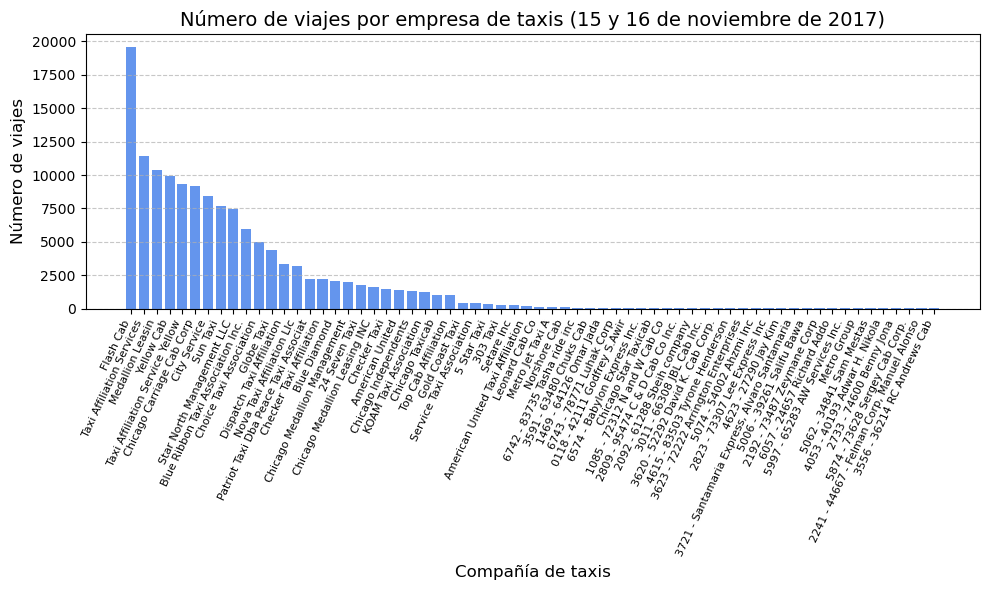

In [80]:
# Gráfico de empresas de taxis y número de viajes
plt.figure(figsize=(10,6))
plt.bar(company_df['company_name'], company_df['trips_amount'], color='cornflowerblue')
plt.title('Número de viajes por empresa de taxis (15 y 16 de noviembre de 2017)', fontsize=14)
plt.xlabel('Compañía de taxis', fontsize=12)
plt.ylabel('Número de viajes', fontsize=12)
plt.xticks(rotation=65, ha='right', fontsize=8)
plt.yticks(fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

En la gráfica anterior se puede observar que, en general, pocas empresas de taxis dominan el mercado de viajes durante el 15 y 16 de noviembre de 2017. Las compañías "Flash Cab" y "Taxi Affiliation Services" son las más utilizadas por los pasajeros en ese periodo.

La empresa Flash Cab tiene el mayor número de viajes entre todas las compañías (19558), lo que probablemente se deba a que tiene una mayor cobertura o una flota de vehículos más grande en comparación con las otras compañías.

Otros factores que podrían estar contribuyendo a las altas cifras de viajes en estas compañías pueden incluir promociones, mayor disponibilidad de vehículos, precios competitivos o mejor posicionamiento en la ciudad.


###  🏠 1.3.2 10 Barrios principales por número de finalizaciones

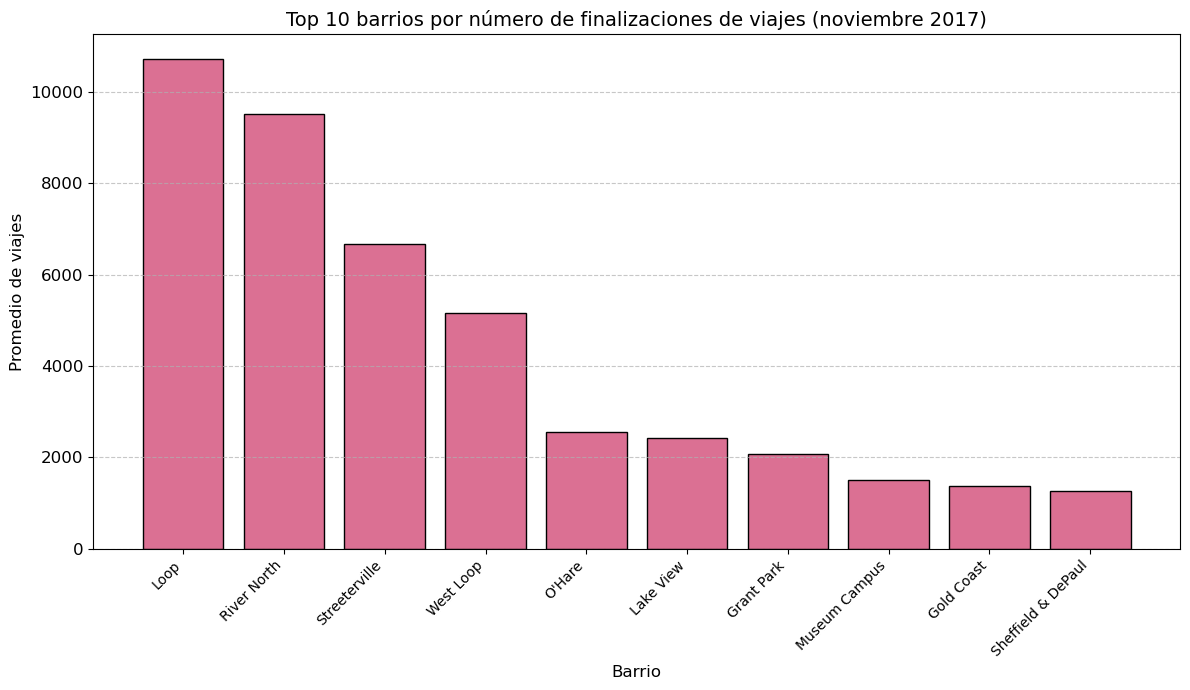

In [76]:
plt.figure(figsize=(12,7))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='palevioletred', edgecolor='black')
plt.title('Top 10 barrios por número de finalizaciones de viajes (noviembre 2017)', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Promedio de viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

En el gráfico anterior se puede observar que Loop es el barrio más transitado en cuanto a la finalización de viajes, lo que se debe a que es el centro económico y turístico de Chicago.
Los barrios con más finalización de viajes son Loop, River North, y Streeterville, siendo Loop el barrio con mpas finalizaciones de viaje. Esto se debe a que son áreas clave de actividad en Chicago, e indica que los pasajeros prefieren utilizar taxis en estos puntos debido a la alta concentración de oficinas, restaurantes y atracciones turísticas.

Aunque O'Hare es el aeropuerto de la ciudad y por lo general es un punto de origen más que de finalización, los viajes hacia este destino siguen siendo significativos, lo que sugiere que muchos pasajeros eligen taxis para llegar al aeropuerto o regresar a la ciudad.

Los barrios como Gold Coast, Museum Campus y Sheffield & DePaul tienen menos finalizaciones en comparación con los barrios más céntricos. Esto podría deberse a que son áreas menos turísticas o con menos actividad general.


## 🧪 2. Prueba de hipótesis

### 🔍  2.1 Revisar tipos de datos

In [96]:
weather_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### 🔜 2.2 Convertir start_ts a datetime

In [101]:
weather_raw['start_ts'] = pd.to_datetime(weather_raw['start_ts'])

In [105]:
weather_data = weather_raw
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### 🚕 2.3 Viajes que ocurren en sábado

In [114]:
saturdays_data = weather_data[weather_data['start_ts'].dt.weekday == 5]

### ✅ 2.4 Viajes con condiciones "Bad" y "Good"

In [118]:
bad_weather = saturdays_data[saturdays_data['weather_conditions'].str.contains('Bad', case=False)]
good_weather = saturdays_data[saturdays_data['weather_conditions'].str.contains('Good', case=False)]

#### ⌛ 2.4.1 Duraciones de ambas condiciones

In [140]:
bad_weather_durations = bad_weather['duration_seconds']
good_weather_durations = good_weather['duration_seconds']

#### Hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

##### Hipótesis nula y alternativa

H0: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos." 

H1: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos."

La hipótesis nula establece que no hay efecto de las condiciones meteorológicas en la duración de los viajes los sábados. Es decir, las duraciones promedio de los viajes son similares para los sábados con clima no lluvioso y lluvioso.

Por otro lado, la hipótesis alternativa  sugiere que sí existe un cambio significativo en la duración de los viajes cuando hay condiciones climáticas lluviosas los sábados en comparación con los sábados no lluviosos.

Si se rechaza la hipótesis nula, aceptamos que las condiciones meteorológicas sí tienen un efecto sobre la duración de los viajes.

##### Prueba de levene

Se realizará una prueba de levene para verificar que las varianzas de ambos grupos son iguales. Si las varianzas no son iguales, se realizará una prueba t ajustada.

H_0: La varianza de la duración de viajes en sábados no lluviosos es igual a la varianza de la duración de viajes en sábados lluviosos.

H_1: La varianza de la duración de viajes en sábados no lluviosos es diferente a la varianza de la duración de viajes en sábados lluviosos.

In [167]:
p_value_levene = sts.levene(bad_weather_durations, good_weather_durations).pvalue

if p_value_levene < alpha:
    print('Se rechaza la H_0: La varianza de la duración de viajes en sábados no lluviosos es diferente a la varianza de la duración de viajes en sábados lluviosos.')
else:
    print('No se puede rechazar la H_0: No hay evidencia suficiente para decir que las varianzas de de la duración de viajes en sábados no lluviosos y la varianza de la duración de viajes en sábados lluviosos no son iguales')

No se puede rechazar la H_0: No hay evidencia suficiente para decir que las varianzas de de la duración de viajes en sábados no lluviosos y la varianza de la duración de viajes en sábados lluviosos no son iguales


##### Prueba t-student

Se realizará una prueba t-student ya que queremos comparar la duración promedio de los viajes en dos grupos independientes entre sí. Los viajes con clima lluvioso en sábados no afectan a los viajes con clima no lluvioso en sábados por lo que no hay una dependencia entre ellos. 

Asumimos que las duraciones de los viajes siguen una distribución normal y se establecerá un nivel de significación de 0.05.Si el valor p es menor que 0.05, rechazamos la hipótesis nula y aceptamos la alternativa.

In [125]:
confidence_level = 0.95
alpha = 1-confidence_level

In [151]:
p_value = sts.ttest_ind(bad_weather_durations, good_weather_durations, equal_var=False).pvalue
print(p_value)
if p_value < alpha:
    print("Se rechaza la H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("No se puede rechazar la H0: No hay evidencia suficiente para decir que las diferencias entre la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en días lluviosos y no lluviosos no son estadísticamente significativas..")

6.738994326108734e-12
Se rechaza la H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


Dado que el valor p (6.738994326108734e-12) es mucho menor que el nivel de significancia establecido (0.05), rechazamos la hipótesis nula.
Se concluye que hay una diferencia significativa en la duración promedio de los viajes los sábados con condiciones meteorológicas "Bad" (lluviosas) en comparación con los días con condiciones "Good" (no lluviosas), es decir, la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

